In [1]:
# 1. 행복지수 막대그래프 대륙별, 나라별 
# 2. 상관계수 히트맵
# 3. 상관계수 높은 변수 각각 2개씩 산점도 그리기
# 4. HS가 연도별 차이가 가장 큰 나라 선그래프 그리기 

#### 데이터 가져오기

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('Project/pdata/happy_0814.csv')
df['country']= df['country'].astype("category")
df['year']= df['year'].astype("category")
df['country_num']= df['country_num'].astype("category")
df['continent']= df['continent'].astype("category")
ndf=df.sample(frac=1,random_state=4).reset_index(drop=True)  # random_state 안 하면 DW가 실행시마다 달라짐
ndf

,country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent
0,Nicaragua,2018,5.819,8.647,0.854,67.50,0.797,0.009,0.713,6.7,7.271933,1.606224,13.48,2.404,6.731602,558,Nor.A
1,Ghana,2012,5.057,8.397,0.685,54.86,0.679,0.040,0.898,6.8,2.164331,0.829040,5.47,4.192,2.803341,288,AF
2,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,2.8,2.483526,0.648848,2.67,5.576,1.761833,204,AF
3,Sri Lanka,2017,4.331,9.440,0.823,67.00,0.827,0.094,0.844,10.9,2.047085,3.587271,9.41,2.206,6.312512,144,AS
4,Bangladesh,2015,4.633,8.216,0.601,62.80,0.815,-0.068,0.721,5.2,0.184365,1.091818,4.26,2.120,5.490531,50,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Colombia,2011,6.464,9.442,0.904,65.92,0.811,-0.073,0.847,7.5,0.240863,1.313381,9.64,1.958,5.655645,170,SA
1877,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,6.1,2.232304,2.190966,4.46,2.333,4.357688,356,AS
1878,Denmark,2017,7.594,10.916,0.952,72.10,0.955,0.155,0.181,12.6,8.592318,1.281387,7.61,1.750,6.558833,208,EU
1879,Bhutan,2014,4.939,9.167,0.880,59.90,0.834,0.268,0.650,3.1,1.656511,1.163591,6.14,2.067,5.800284,64,AS


In [154]:
# HS 정규화 안 함 -> ndfnor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
xnor = MinMaxScaler().fit_transform(x)

ndfnor = pd.DataFrame(xnor)
ndfnor.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']

# 정규화 안한 컬럼 dfnor에 추가
ndfnor[['HS','year','country','country_num','continent']]= ndf[['HS','year','country','country_num','continent']]
ndfnor

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,558,Nor.A
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,288,AF
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,204,AF
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,144,AS
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,50,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,6.464,2011,Colombia,170,SA
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,4.424,2014,India,356,AS
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,7.594,2017,Denmark,208,EU
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,4.939,2014,Bhutan,64,AS


In [155]:
# HS도 정규화 -> ndfnor2

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x2= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental','HS']]
xnor2 = MinMaxScaler().fit_transform(x2)

ndfnor2 = pd.DataFrame(xnor2)
ndfnor2.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental','HS']

ndfnor2[['year','country','country_num','continent']]= ndf[['year','country','country_num','continent']]
ndfnor2

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,0.610206,2018,Nicaragua,558,Nor.A
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,0.475195,2012,Ghana,288,AF
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,0.169206,2006,Benin,204,AF
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,0.346563,2017,Sri Lanka,144,AS
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,0.400071,2015,Bangladesh,50,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,0.724486,2011,Colombia,170,SA
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,0.363040,2014,India,356,AS
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,0.924699,2017,Denmark,208,EU
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,0.454288,2014,Bhutan,64,AS


#### 군집분류

In [159]:
from sklearn import cluster
X = ndfnor[['HS']]
kmeans = cluster.KMeans(init='k-means++', n_clusters = 3, n_init = 10,random_state=4)
kmeans.fit(X)                 
cluster_label = kmeans.labels_
print(cluster_label)

[0 0 1 ... 2 0 1]


In [162]:
ndfnor['cluster'] = cluster_label
ndfnor

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent,cluster
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,558,Nor.A,0
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,288,AF,0
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,204,AF,1
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,144,AS,1
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,50,AS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,6.464,2011,Colombia,170,SA,2
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,4.424,2014,India,356,AS,1
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,7.594,2017,Denmark,208,EU,2
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,4.939,2014,Bhutan,64,AS,0


In [163]:
ndfnor2['cluster'] = cluster_label
ndfnor2

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent,cluster
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,0.610206,2018,Nicaragua,558,Nor.A,0
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,0.475195,2012,Ghana,288,AF,0
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,0.169206,2006,Benin,204,AF,1
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,0.346563,2017,Sri Lanka,144,AS,1
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,0.400071,2015,Bangladesh,50,AS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,0.724486,2011,Colombia,170,SA,2
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,0.363040,2014,India,356,AS,1
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,0.924699,2017,Denmark,208,EU,2
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,0.454288,2014,Bhutan,64,AS,0


In [164]:
ndfnor.replace({'cluster': 0}, {'cluster': 'Mid'},inplace=True)
ndfnor.replace({'cluster': 1}, {'cluster': 'Low'},inplace=True)
ndfnor.replace({'cluster': 2}, {'cluster': 'High'},inplace=True)
ndfnor

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent,cluster
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,558,Nor.A,Mid
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,288,AF,Mid
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,204,AF,Low
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,144,AS,Low
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,50,AS,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,6.464,2011,Colombia,170,SA,High
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,4.424,2014,India,356,AS,Low
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,7.594,2017,Denmark,208,EU,High
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,4.939,2014,Bhutan,64,AS,Mid


In [165]:
ndfnor2.replace({'cluster': 0}, {'cluster': 'Mid'},inplace=True)
ndfnor2.replace({'cluster': 1}, {'cluster': 'Low'},inplace=True)
ndfnor2.replace({'cluster': 2}, {'cluster': 'High'},inplace=True)
ndfnor

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent,cluster
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,558,Nor.A,Mid
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,288,AF,Mid
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,204,AF,Low
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,144,AS,Low
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,50,AS,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,6.464,2011,Colombia,170,SA,High
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,4.424,2014,India,356,AS,Low
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,7.594,2017,Denmark,208,EU,High
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,4.939,2014,Bhutan,64,AS,Mid


In [166]:
ndfnor['cluster'].value_counts()

Mid     767
Low     597
High    517
Name: cluster, dtype: int64

#### 1. 대륙별 행복지수 수평막대그래프 

In [167]:
# 대륙별 행복지수 구하기 
HS_mean = ndfnor.groupby(['continent'])['HS'].mean().to_frame().sort_values(by='HS',ascending = False)
HS_mean = HS_mean.reset_index()
HS_mean

,continent,HS
0,OC,7.296179
1,Nor.A,6.171580
2,EU,6.164129
3,SA,6.054190
4,AS,5.282743
5,AF,4.362888


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Happiness Score of Each Continent'}, xlabel='HS', ylabel='continent'>

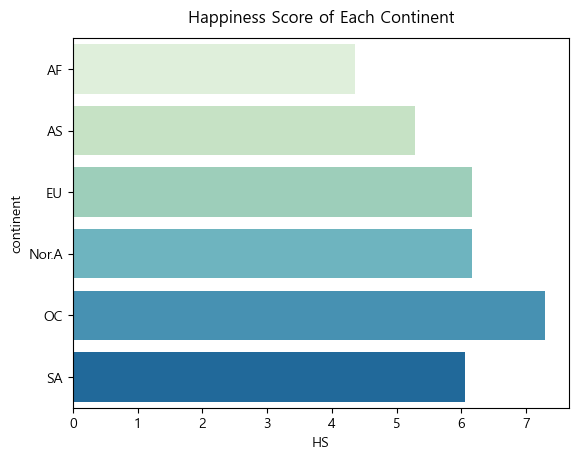

In [189]:
# 대륙별 행복지수 수평막대그래프
from matplotlib import font_manager, rc
import seaborn as sns
plt.style.use('default')
plt.rc('font', family='Malgun Gothic')
plt.title('Happiness Score of Each Continent', y = 1.02)
palette = sns.set_palette("GnBu")
sns.barplot('HS','continent', data=HS_mean)

#### 2. 나라별 행복지수 수평막대그래프(상,하위 5개국)

In [169]:
# 나라별 행복지수 구하기
ndfnor['country']= ndfnor['country'].astype("object")
HS_mean_country = ndfnor.groupby(['country'])['HS'].mean().to_frame().sort_values(by='HS',ascending = False)
HS_mean_country

,HS
country,
Denmark,7.680400
Finland,7.597154
Switzerland,7.548300
Norway,7.512400
Netherlands,7.466286
...,...
Rwanda,3.654417
Afghanistan,3.594667
Togo,3.555000


In [170]:
# 상위 5개 국가, 하위 5개 국가
HS_mean_country_top = HS_mean_country.head(5)
HS_mean_country_bot = HS_mean_country.tail(5)
HS_mean_country = pd.concat([HS_mean_country_top,HS_mean_country_bot])
HS_mean_country.index

Index(['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Rwanda',
       'Afghanistan', 'Togo', 'Burundi', 'Central African Republic'],
      dtype='object', name='country')

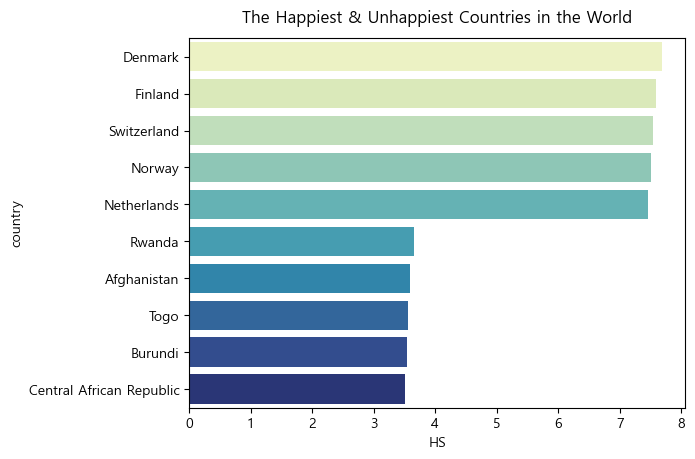

In [190]:
# 나라별 행복지수 막대그래프
plt.title('The Happiest & Unhappiest Countries in the World', y = 1.02)
sns.barplot(data=HS_mean_country,x='HS', y=HS_mean_country.index, palette = 'YlGnBu')
plt.show()

#### 3. 각 변수와의 상관계수 히트맵

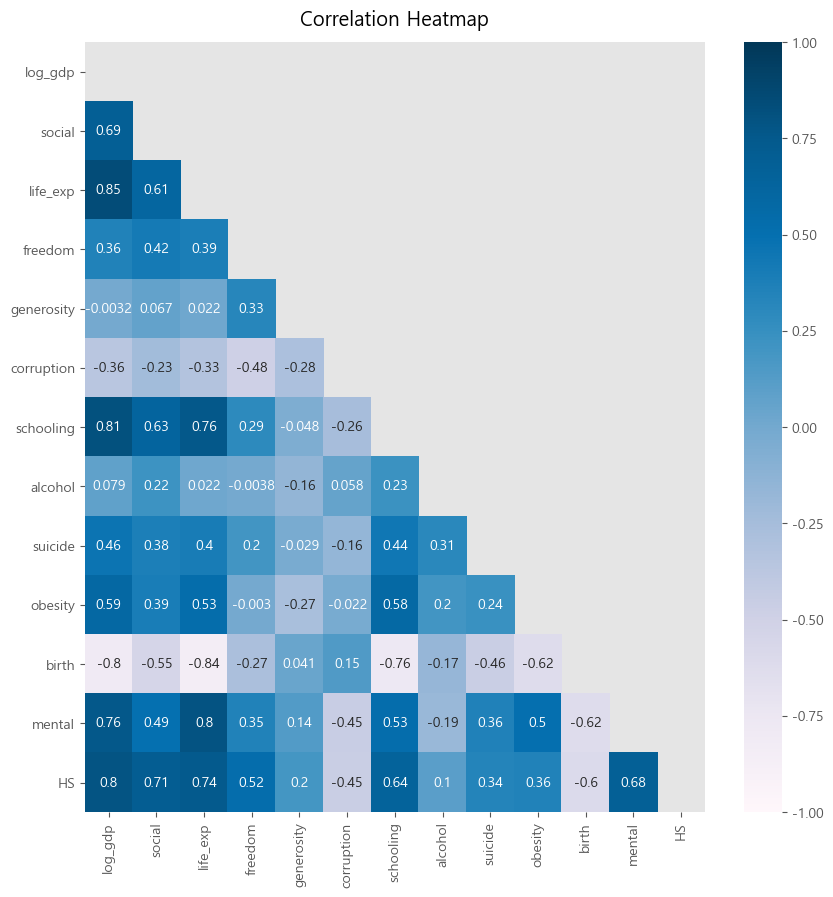

In [196]:
data = ndfnor.drop(['cluster','continent','country_num','country','year'],axis=1)
np.triu(np.ones_like(data.corr()))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
plt.rcParams['axes.unicode_minus']=False 
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="PuBu", 
            cbar = True)
plt.title('Correlation Heatmap', pad = 12)
plt.show()

#### 4. 각 변수별 행복지수(HS)와 상관계수 히트맵

                  HS
HS          1.000000
log_gdp     0.795665
life_exp    0.744608
social      0.711477
mental      0.681296
schooling   0.643004
freedom     0.524597
obesity     0.355662
suicide     0.343523
generosity  0.195073
alcohol     0.104403
corruption -0.454071
birth      -0.599434


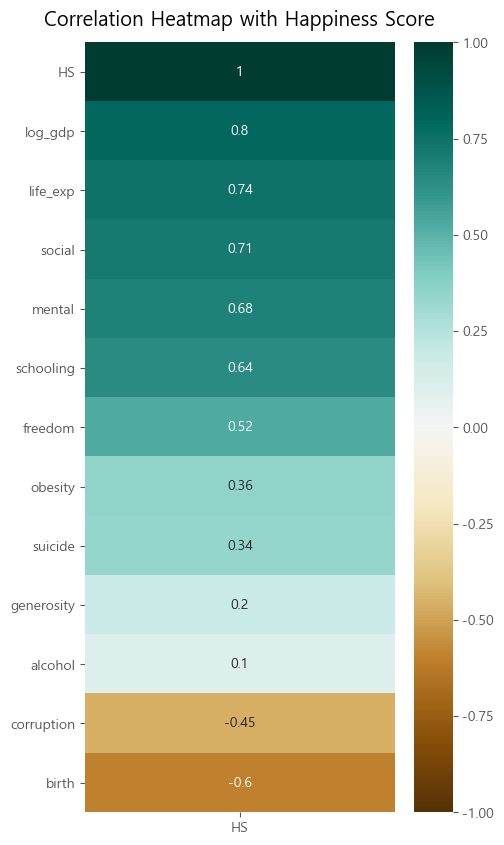

In [197]:
print(data.corr()[['HS']].sort_values(by='HS', ascending=False))
data_ylabels = data.corr()[['HS']].sort_values(by='HS', ascending=False).index.tolist()
data.corr()[['HS']].sort_values(by='HS', ascending=False).index
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(data.corr()[['HS']].sort_values(by='HS', ascending=False), 
            vmin = -1, vmax = 1, annot=True, cmap="BrBG")
ax.set_title('Correlation Heatmap with Happiness Score', pad = 12)
ax.set_yticklabels(data_ylabels, rotation=0) # y축을 가로형으로 변환
plt.show()


# log_gdp, life_exp가 양의 상관관계, corruption, birth가 음의 상관관계

#### 5. HS, log_gdp, life_exp의 산점도 

#### - log_gdp가 높을수록, life_exp가 높을수록 행복지수도 높아짐.

Text(0.5, 1.02, 'Happiness Score, GDP, and Life Expectancy')

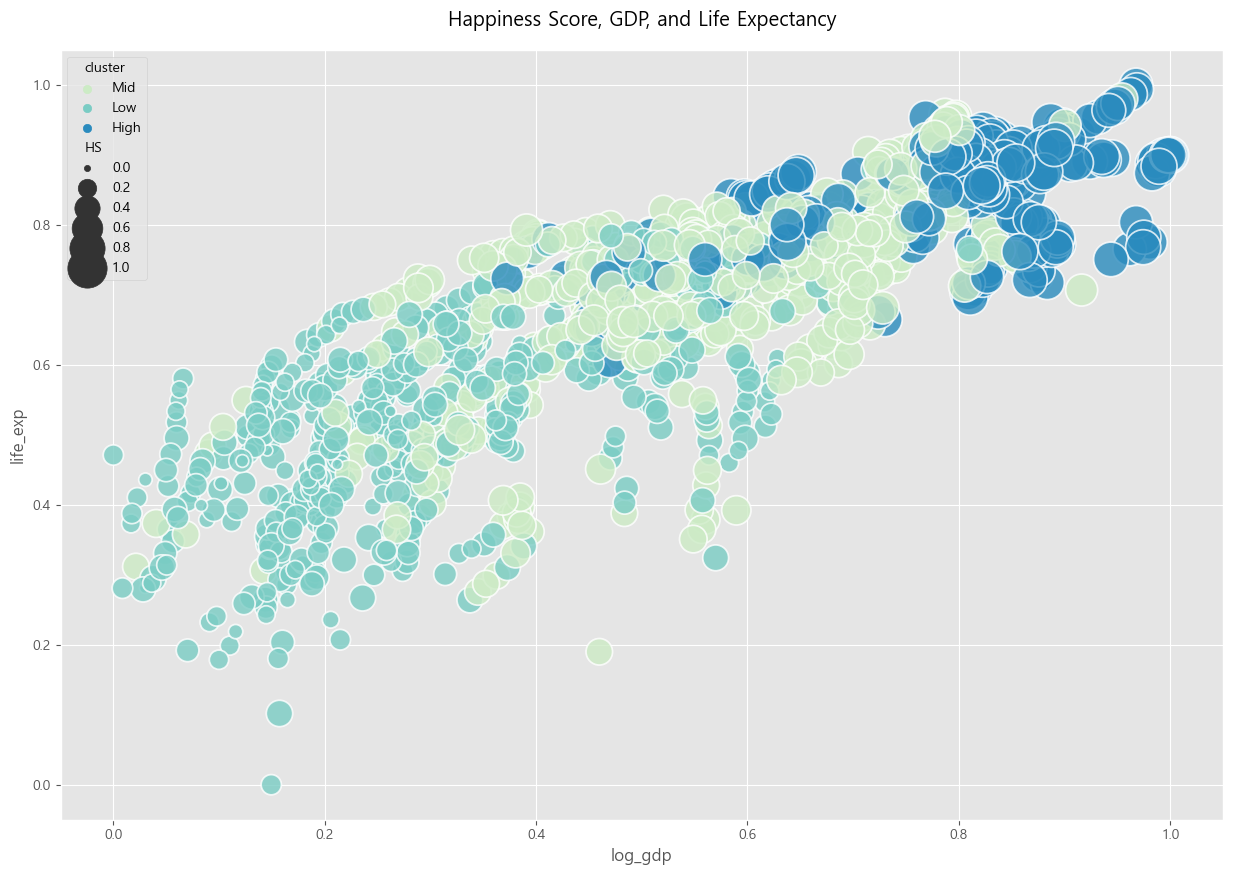

In [192]:
# HS, log_gdp, life_exp의 산점도 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 10]
sns.scatterplot(data=ndfnor2,   # 버블의 크기변화가 정규화된 HS에서 더 잘 나타나서 행복지수 정규화값으로 반영
                x="log_gdp", 
                y="life_exp", 
                size="HS", 
                hue='cluster',
                alpha = 0.8, 
                palette="GnBu",
                legend=True, 
                sizes=(20, 800))
plt.title('Happiness Score, GDP, and Life Expectancy', y = 1.02)

#### 6. HS, corruption, birth 의 산점도 
#### - 행복지수가 낮은 나라일수록 birth와 corruption이 높은 것을 알 수 있음
#### - 행복지수가 높은 나라에서는 corruption 수치는 어느정도 고르게 분포하지만 birth가 확실히 낮음

Text(0.5, 1.02, 'Happiness Score, Corruption, and Birth Rate')

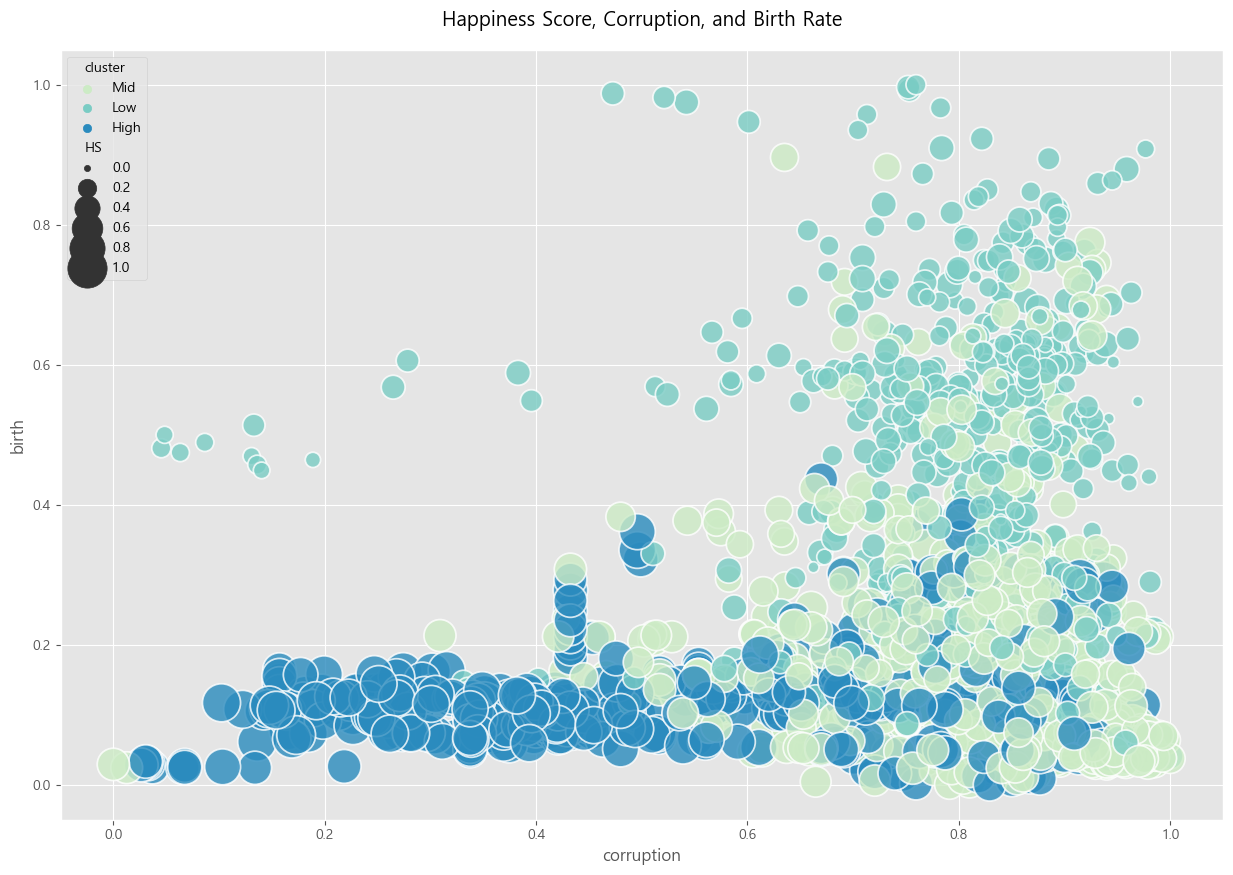

In [195]:
# HS, corruption, birth 의 산점도 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 10]
sns.scatterplot(data=ndfnor2,  # 버블의 크기변화가 정규화된 HS에서 더 잘 나타남 
                x="corruption", 
                y="birth", 
                size="HS", 
                hue='cluster',
                alpha = 0.8, 
                palette="GnBu",
                legend=True, 
                sizes=(20, 800))
plt.title('Happiness Score, Corruption, and Birth Rate', y = 1.02)